<a href="https://colab.research.google.com/github/priyabodke41/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
#importing necessery libraries for future analysis of the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [20]:
plt.style.use('seaborn')
plt.rcParams['axes.titlesize']=25
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.labelsize']=20
plt.rcParams['font.weight']='bold'
plt.rcParams['legend.fontsize']=15
plt.rcParams['legend.title_fontsize']=15


In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [5]:
#Using pandas library lets access the hotel booking file.
hoteldf=pd.read_csv('/content/Hotel Bookings (2).csv')

**Understanding Data**

In [ ]:
#lets find 1st 5 rows
hoteldf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#lets check last 5 rows
hoteldf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#using info function lets check datatype & dataname
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#lets check the number of rows and coloumns of given dataset to understand the size we are working on
hoteldf.shape

(119390, 32)

In [ ]:
#lets find descriptive statistics summary of a given dataframe
hoteldf.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
#checking type of every column in the dataset
hoteldf.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

We have alredy seen some Nan values,Which will require cleaning and handling of those Nan values.




In [ ]:
#Lets check which columns have Nan values using isnull() function,
#sum() function will show us how many null values are found in each coloumn.
hoteldf.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#we have found Nan values in 'childrean','contry','agent','company' coloumns
#looking into the nature of our dataset coloumn 'company' is insignificant to our data analysis.
#Droping coloumns that are not significant
hoteldf.drop('company', axis=1, inplace=True)

In [ ]:
hoteldf.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [ ]:
#Replacing all Nan values in 'childrean' and 'agent' with 0
hoteldf[['children']]=hoteldf[['children']].fillna(0)
hoteldf[['agent']]=hoteldf[['agent']].fillna(0)

In [ ]:
#Replacing all Nan values in 'country' with 'others'
hoteldf[['country']]=hoteldf[['country']].fillna('other')

In [ ]:
hoteldf.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**1.Which type of hotel mostly preffered by the guests?**

In [ ]:
hoteldf.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of guests')

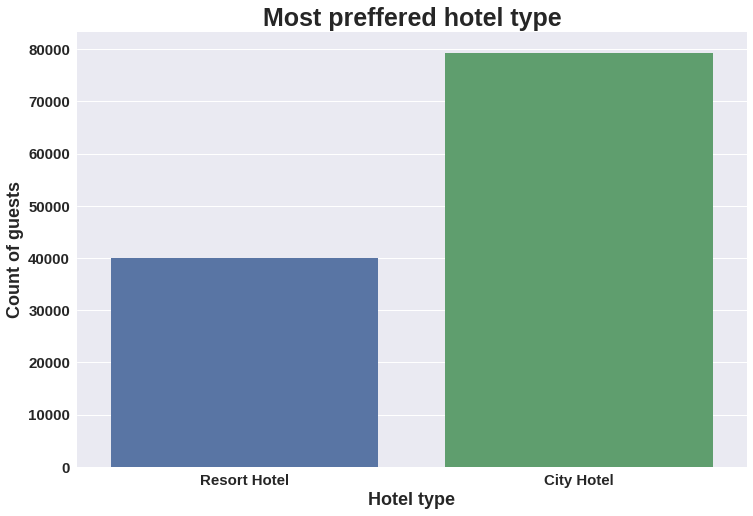

In [ ]:
plt.figure(figsize=(12,8))
hoteltype=sns.countplot(hoteldf.hotel)
hoteltype.set_title('Most preffered hotel type',fontsize=25)
hoteltype.set_xlabel('Hotel type',fontsize=18)
hoteltype.set_ylabel('Count of guests',fontsize=18)



**Conclusion** : Most number of guests preffered city hotel.

**2.which months has the most bookings?**

In [ ]:
hoteldf.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of guests')

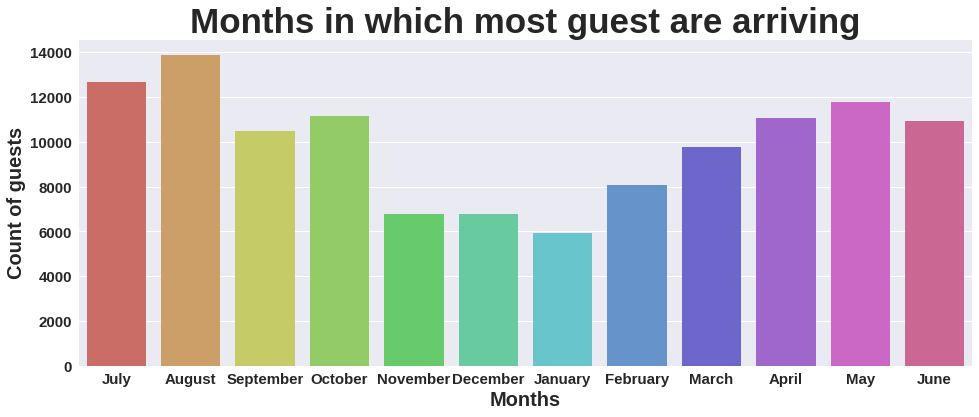

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(hoteldf.arrival_date_month, palette='hls')
plt.title('Months in which most guest are arriving')
plt.xlabel('Months')
plt.ylabel('Count of guests')


**Conclusion** : The hotel reservation tends to peak during July and August.



**3.Which year has the highest bookings?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of guests')

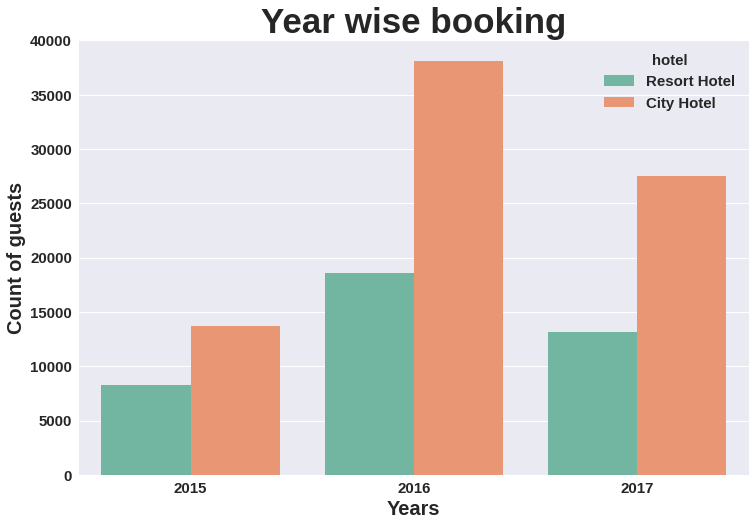

In [ ]:

plt.figure(figsize=(12,8))
sns.countplot(hoteldf.arrival_date_year,hue=hoteldf.hotel,palette='Set2')
plt.title('Year wise booking')
plt.xlabel('Years')
plt.ylabel('Count of guests')


**Conclusion:** Year 2016 has the highest bookings in Resort hotel as well as City hotel.

**4.From which country most guest are coming?**

In [ ]:
hoteldf.country.value_counts()[:10]
country_new=hoteldf.country.value_counts()[:10].reset_index().rename(columns={'index':'country','country':'total guest'})
country_new


,country,total guest
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


Text(0.5, 1.0, 'Total number of guest from different countries ')

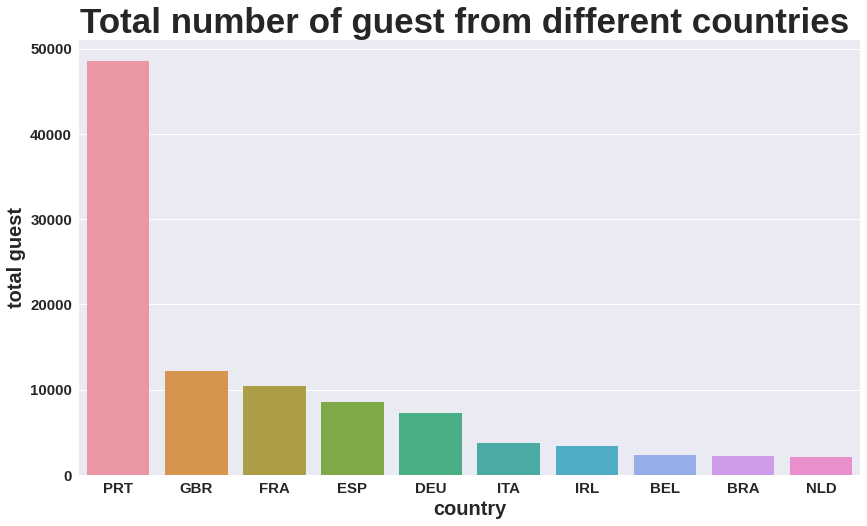

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x=country_new['country'],y=country_new['total guest'])
plt.title('Total number of guest from different countries ')


**conclusion:** Most of the guests are coming from portugal 

**5.What are the percentage of repeated guests?**

Text(0.5, 1.0, 'Most repeated guests for each hotel')

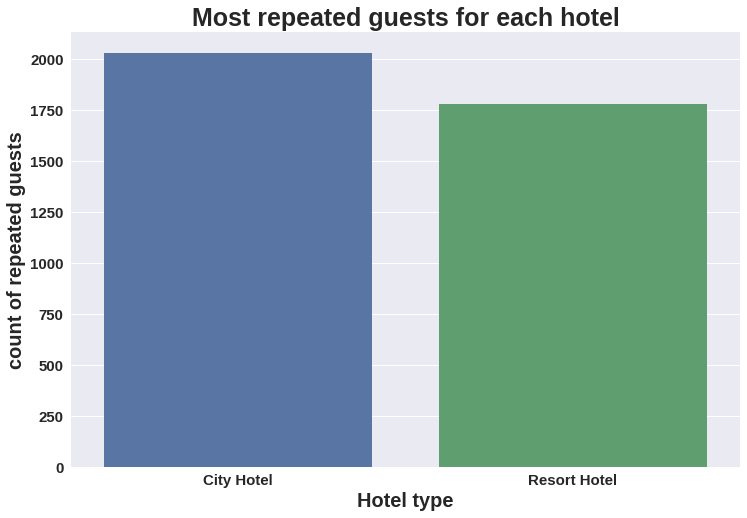

In [42]:
repeated_guests_df=hoteldf[hoteldf['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'total_repated_guests'})
plt.figure(figsize=(12,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['total_repated_guests'])
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

**Conclusion:**  Resort Hotel has slightly more repeated guests than the City Hotels.




**6.What are the different sources of hotel booking?**

In [ ]:
hoteldf.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sources of hotel booking')

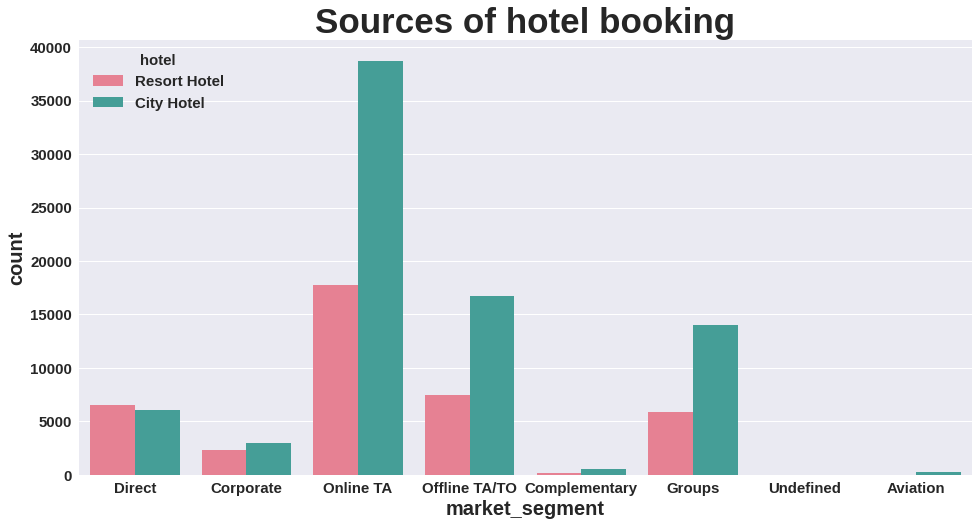

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(hoteldf.market_segment,hue=hoteldf.hotel,palette='husl')
plt.title('Sources of hotel booking')


**Conclusion:** Mostly used source for hotel booking is online TA(travel agent) in both type of hotels.

**7.Which is the most preferred room type by the customers?**

In [ ]:
hoteldf.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of guests')

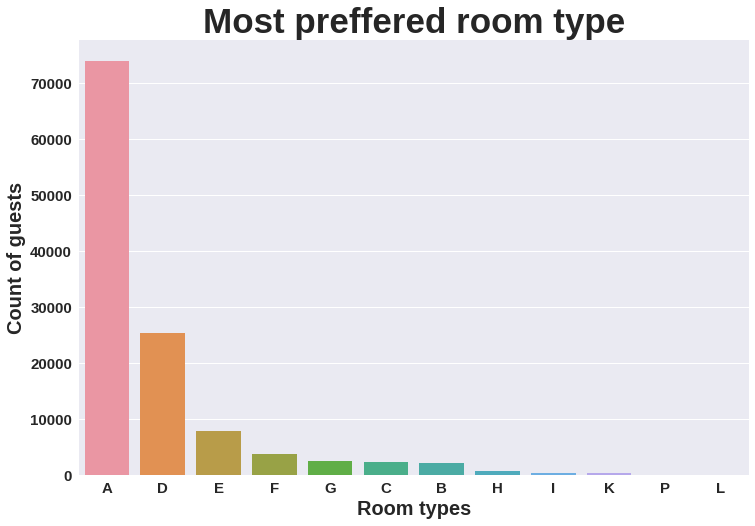

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(hoteldf.assigned_room_type,order=hoteldf.assigned_room_type.value_counts().index)
plt.title('Most preffered room type')
plt.xlabel('Room types')
plt.ylabel('Count of guests')

**Conclusion:** So the most preferred Room type is "A". 

**8.Market segment on the basis of months?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Months')

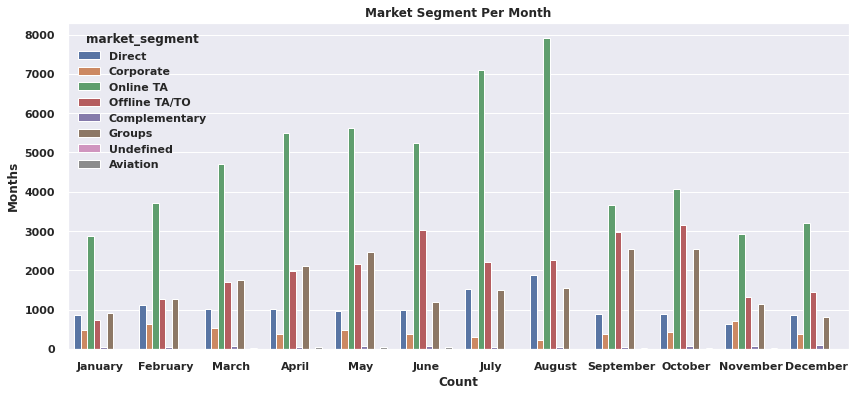

In [ ]:
plt.figure(figsize=(14,6))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
graph = sns.countplot('arrival_date_month', hue='market_segment', data=hoteldf, order=order)
plt.title('Market Segment Per Month')
plt.xlabel('Count')
plt.ylabel('Months')

In [ ]:
**Conlcusion:** Graph shows different market segments across months, According to this graph in every month online TA segment effect the most.



**9.How many guests required parking space?**

In [ ]:
hoteldf.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

Text(0.5, 1.0, ' Percentge (%) of car parking requirement ')

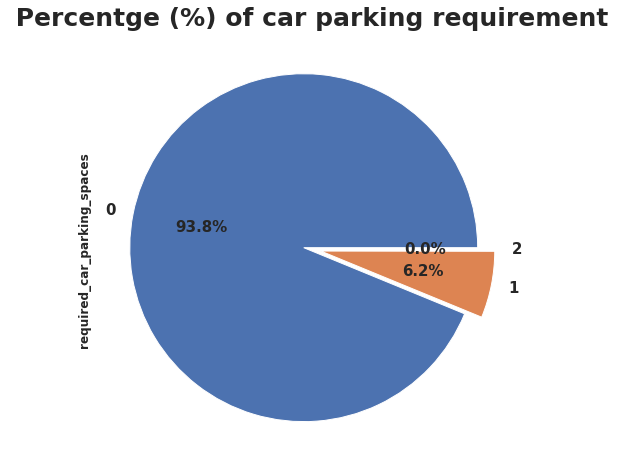

In [ ]:
plt.figure(figsize=(10,8))
hoteldf.required_car_parking_spaces.value_counts()[:3].plot.pie(explode=([0.05]*3),autopct='%1.1f%%',fontsize=15)
plt.title(" Percentge (%) of car parking requirement ",fontsize=25)

**Conclusion:** Graph shows more than 90% guests do not required parking spaces only few guest needs parking(ie.6.2%)

**10.Which hotel has the highest adr?**



<Figure size 720x576 with 0 Axes>

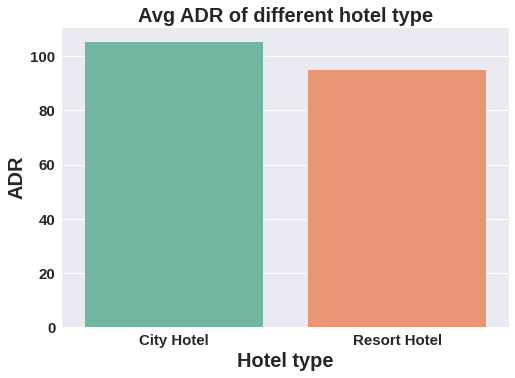

<Figure size 720x576 with 0 Axes>

In [11]:
highest_adr=hoteldf.groupby('hotel')['adr'].mean().reset_index()
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'],palette='Set2')
plt.title('Avg ADR of different hotel type',fontsize=20)
plt.xlabel('Hotel type')
plt.ylabel('ADR')

plt.figure(figsize=(10,8))


**Conclusion:** City hotel has the highest ADR.

**11.Which Market Segment has the higest cancellation rate?**

In [18]:
market_segmentsdf=hoteldf[hoteldf['is_canceled']==1].groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})
market_segmentsdf

,market_segment,hotel,counts
0,Aviation,City Hotel,52
1,Complementary,City Hotel,64
2,Complementary,Resort Hotel,33
3,Corporate,City Hotel,641
4,Corporate,Resort Hotel,351
5,Direct,City Hotel,1056
6,Direct,Resort Hotel,878
7,Groups,City Hotel,9623
8,Groups,Resort Hotel,2474
9,Offline TA/TO,City Hotel,7173


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

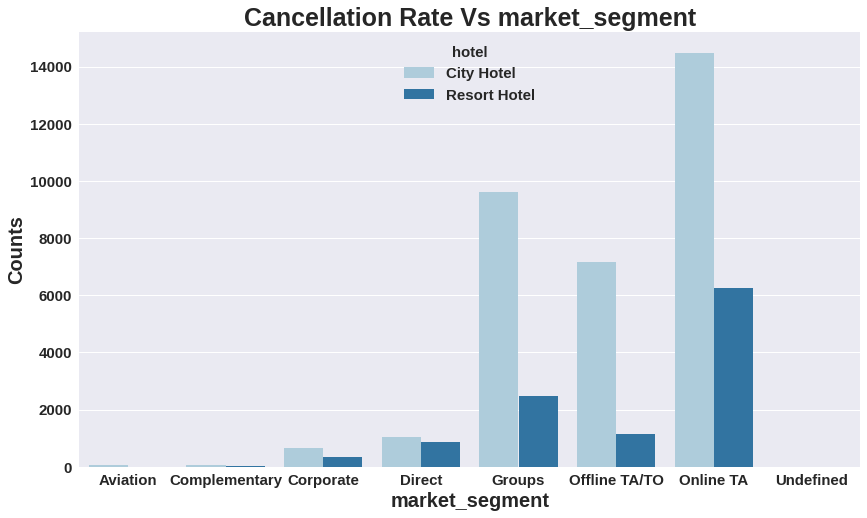

In [44]:
plt.figure(figsize=(14,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data=market_segmentsdf,palette='Paired')
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

**Conclusion:** Online T/A(Travel agent) has the highest cancellation in both type of hotel



**12.Which type of food is most prefferable?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Preferred Meal Type')

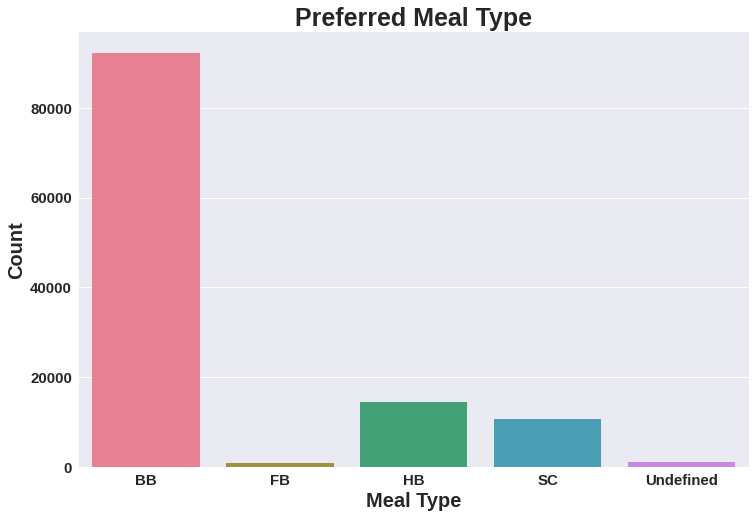

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(hoteldf['meal'],palette='husl')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

**Conclusion:**The most preferred meal type by the guests is BB where HB and SC are equally preferred.

**13.Which hotel type has the highest number of booking cancel?**


In [38]:
highest_cancel_booking=hoteldf[hoteldf['is_canceled']==1].groupby('hotel').size().reset_index().rename(columns={0:'total_canceled_bookings'})

Text(0.5, 1.0, 'Percentage of booking cancellation')

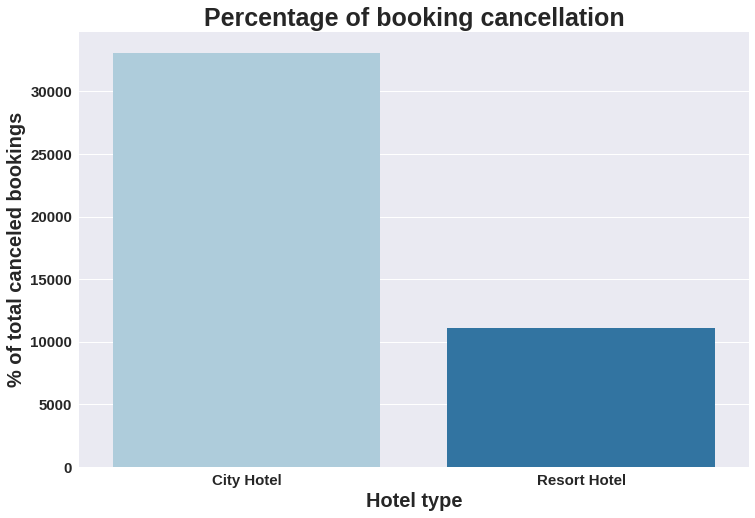

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x='hotel',y='total_canceled_bookings',data=highest_cancel_booking,palette='Paired')
plt.xlabel('Hotel type')
plt.ylabel('% of total canceled bookings')
plt.title('Percentage of booking cancellation')

**Conclusion:** City hotel has highest percentage of booking cancelation.

**14.What is adr across different months?**

In [45]:
bookings_by_months=hoteldf.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_months['arrival_date_month']=pd.Categorical(bookings_by_months['arrival_date_month'],categories=order,ordered=True)
bookings_by_months=bookings_by_months.sort_values('arrival_date_month')
bookings_by_months

,arrival_date_month,hotel,adr
8,January,City Hotel,82.628986
9,January,Resort Hotel,49.461883
6,February,City Hotel,85.088278
7,February,Resort Hotel,55.171930
15,March,Resort Hotel,57.520147
14,March,City Hotel,92.643116
0,April,City Hotel,111.251838
1,April,Resort Hotel,77.849496
17,May,Resort Hotel,78.758134
16,May,City Hotel,121.638560


Text(0, 0.5, 'ADR')

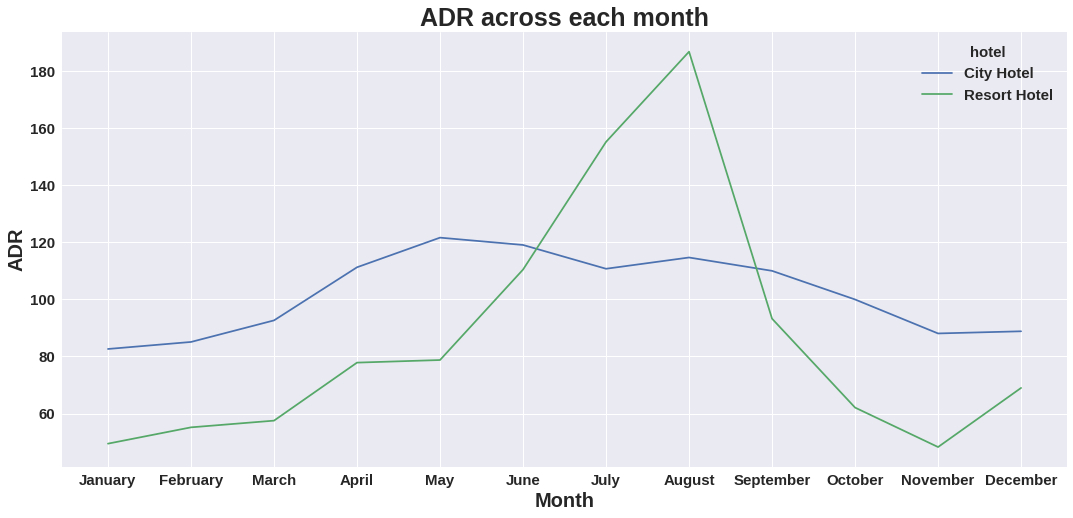

In [47]:
plt.figure(figsize=(18,8))
sns.lineplot(x=bookings_by_months['arrival_date_month'],y=bookings_by_months['adr'],hue=bookings_by_months['hotel'])
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

**Conclusion:**For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

**FINAL CONCLUSIONS SUMMERY:**

1.   
2.   List item



